In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf
#import pygmt
from pyproj import Proj, Geod
P = Proj('epsg:32610')
G = Geod(ellps='WGS84')
import rasterio

import sys
sys.path.append('/Users/chanagan/Documents/GitHub/ImageryResources/Functions/')
import TiffTools as tt

# reload modules when changed
%reload_ext autoreload
%autoreload 2

In [2]:
# Read the rasters
ns = rasterio.open('/Volumes/ProjectsGarlockCSAF/CSAF_Lidar/MicmacAreaResults/SsResolOpt1/MaskedResults/Velocities/NS_velocity_merged.tif')
ew = rasterio.open('/Volumes/ProjectsGarlockCSAF/CSAF_Lidar/MicmacAreaResults/SsResolOpt1/MaskedResults/Velocities/EW_velocity_merged.tif')



In [3]:
!ls /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Desktop/Manuscripts/CSAF/AA_StationCompilations/

BagbyRanchAlignmentArray_20250616.txt   SlackCanyonAlignmentArray_20250616.txt
DeAlvarezAlignmentArray_20250616.txt    SmithRanchAlignmentArray_20250616.txt
DurhamRanchAlignmentArray_20250616.txt  TopoCreekAlignmentArray_20250616.txt
MeeRanchAlighnmentArray_20250616.txt    Trash
MonarchPeakAlighnmentArray_20250616.txt


In [6]:
def fault_curve_fit_noslope(x, a, b, c, ws):
    '''From Milliner et al., 2021
    The solved parameters include the intercept (a), the total fault displacement (b), 
    the fault location (c), the shear width (ws)'''
    return a+b/2*erf((x-c)/(ws*np.sqrt(2)))

def fault_curve_fit(x, a, b, c, ws, m):
    '''From Milliner et al., 2021
    The solved parameters include the intercept (a), the total fault displacement (b), 
    the fault location (c), the shear width (ws), and the slope (m),'''
    return a+b/2*erf((x-c)/(ws*np.sqrt(2)))+m*x

In [7]:
# Read in an alignment array
flist = ['/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Desktop/Manuscripts/CSAF/AA_StationCompilations/BagbyRanchAlignmentArray_20250616.txt',
'/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Desktop/Manuscripts/CSAF/AA_StationCompilations/MonarchPeakAlighnmentArray_20250616.txt',
'/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Desktop/Manuscripts/CSAF/AA_StationCompilations/DeAlvarezAlignmentArray_20250616.txt',
'/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Desktop/Manuscripts/CSAF/AA_StationCompilations/SlackCanyonAlignmentArray_20250616.txt',
'/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Desktop/Manuscripts/CSAF/AA_StationCompilations/DurhamRanchAlignmentArray_20250616.txt',
'/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Desktop/Manuscripts/CSAF/AA_StationCompilations/SmithRanchAlignmentArray_20250616.txt',
'/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Desktop/Manuscripts/CSAF/AA_StationCompilations/MeeRanchAlighnmentArray_20250616.txt',
'/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Desktop/Manuscripts/CSAF/AA_StationCompilations/TopoCreekAlignmentArray_20250616.txt']


In [9]:
# dictionary to store relevant aa info
# SW most station, indices for linear calc 
# indices for across-fault distance and fzw
aaDict = {
'Bagby Ranch':{'Ref Station':'BRAA04','Install Date':'1970-08-12',
                'linest':['BRAA04','BRAA05','BRAA06','BRAA07','BRAA08','BRAA09','BRAA10'],'Omit':None},
'Monarch Peak':{'Ref Station':'MPAA02','Install Date':'1968-02-13',
                'linest':['MPAA02','MPAA03','MPAA04','MPAA05'],'Omit':None},
'DeAlvarez Ranch':{'Ref Station':'DARAA10','Install Date':'1970-08-13',
                'linest':['DARAA08','DARAA10','DARAA11','DARAA12','DARAA13','DARAA14','DARAA16'],
                'Omit':['DARAA06','DARAA05','DARAA04']},
'Slack Canyon':{'Ref Station':'SCAA12','Install Date':'1968-02-14',
                'linest':['SCAA12','SCAA11','SCAA10','SCAA07','SCAA06'],'Omit':None},
'Durham Ranch':{'Ref Station':'DRAA02','Install Date':'1968-02-15',
                'linest':['DRAA02','DRAA03','DRAA04','DRAA05'],'Omit':None},
'Smith Ranch':{'Ref Station':'SRAA17','Install Date':'1967-10-05',
                'linest':['SRAA17','SRAA16','SRAA15','SRAA14','SRAA13','SRAA11',],'Omit':None},
'Mee Ranch':{'Ref Station':'MEE04','Install Date':'1970-08-26',
                'linest':['MEE04','MEE05','MEE06','MEE07'],'Omit':None},
'Topo Creek':{'Ref Station':'TCAA16','Install Date':'2025-05-14',
                'linest':['TCAA16','TCAA15','TCAA14','TCAA13','TCAA12','TCAA11','TCAA10',],'Omit':None}
}


/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:41: RuntimeWarning: invalid value encountered in sqrt
  sig_post = np.sqrt(np.sum((par_vel - fault_curve_fit_noslope(perp_locs,*popt)**2)/(len(par_vel)-len(popt))))


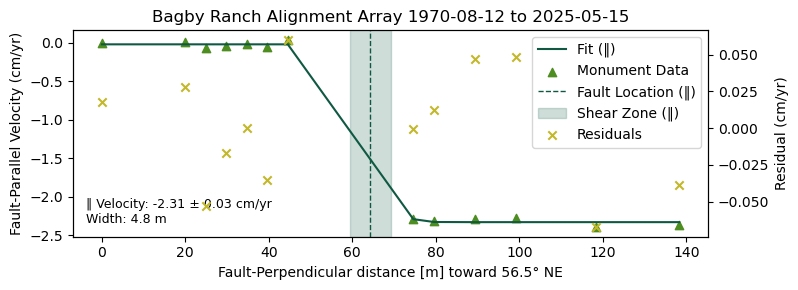

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-ref['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-ref['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:41: RuntimeWarning: invalid value encountered in sqrt
  sig_p

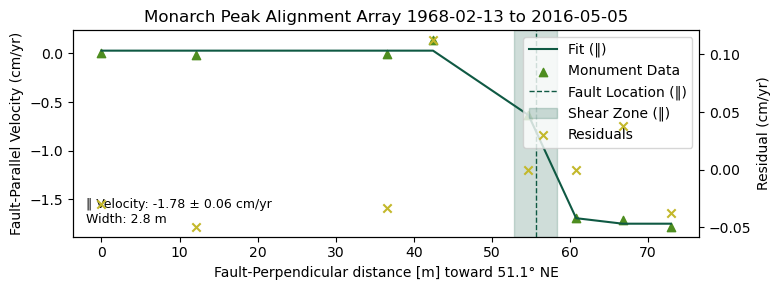

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-ref['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-ref['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:41: RuntimeWarning: invalid value encountered in sqrt
  sig_p

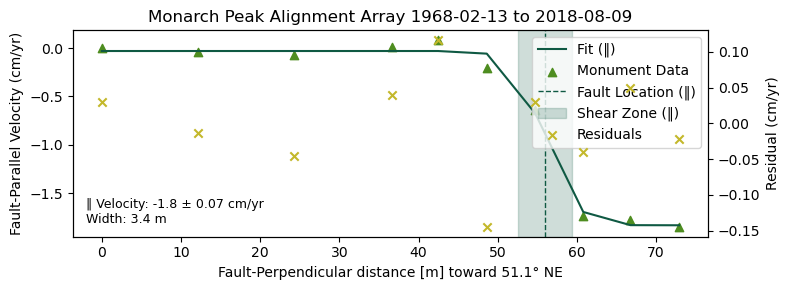

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-ref['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-ref['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:41: RuntimeWarning: invalid value encountered in sqrt
  sig_p

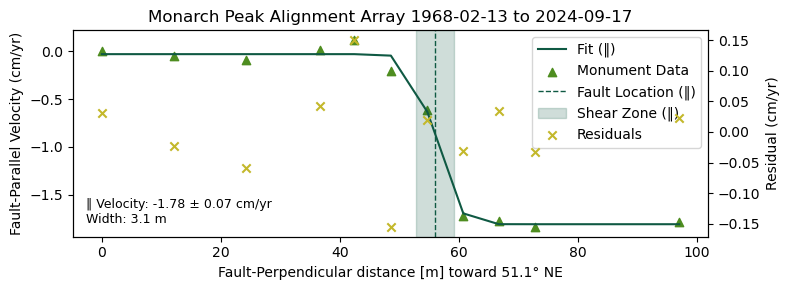

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-ref['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-ref['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:41: RuntimeWarning: invalid value encountered in sqrt
  sig_p

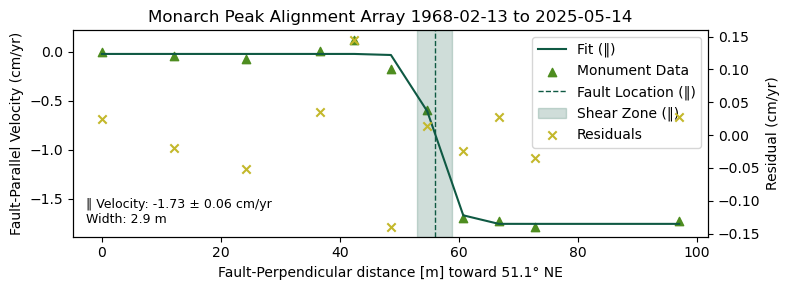

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:41: RuntimeWarning: invalid value encountered in sqrt
  sig_post = np.sqrt(np.sum((par_vel - fault_curve_fit_noslope(perp_locs,*popt)**2)/(len(par_vel)-len(popt))))


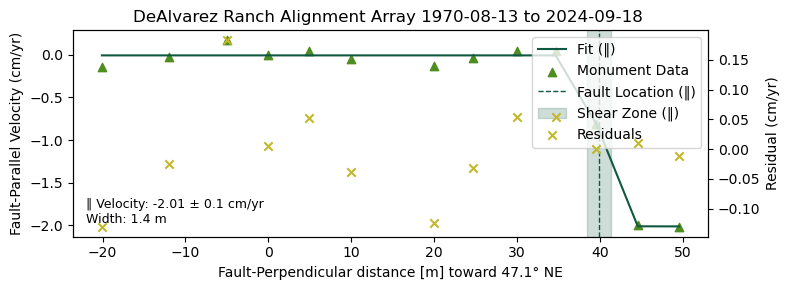

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:41: RuntimeWarning: invalid value encountered in sqrt
  sig_post = np.sqrt(np.sum((par_vel - fault_curve_fit_noslope(perp_locs,*popt)**2)/(len(par_vel)-len(popt))))


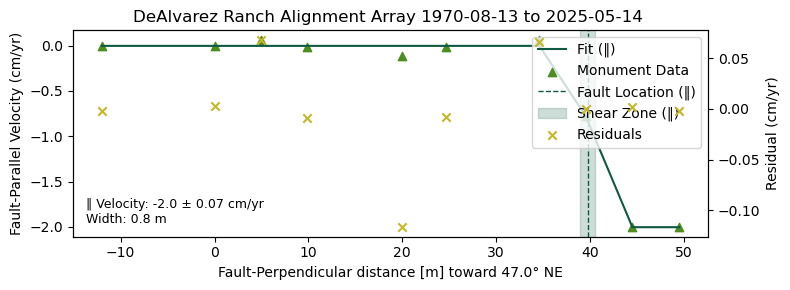

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:41: RuntimeWarning: invalid value encountered in sqrt
  sig_post = np.sqrt(np.sum((par_vel - fault_curve_fit_noslope(perp_locs,*popt)**2)/(len(par_vel)-len(popt))))


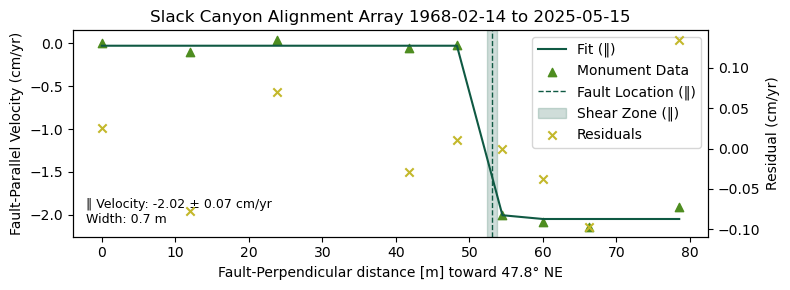

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:41: RuntimeWarning: invalid value encountered in sqrt
  sig_post = np.sqrt(np.sum((par_vel - fault_curve_fit_noslope(perp_locs,*popt)**2)/(len(par_vel)-len(popt))))


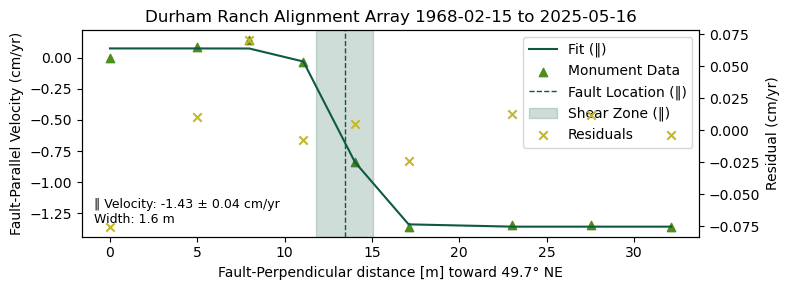

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:41: RuntimeWarning: invalid value encountered in sqrt
  sig_post = np.sqrt(np.sum((par_vel - fault_curve_fit_noslope(perp_locs,*popt)**2)/(len(par_vel)-len(popt))))


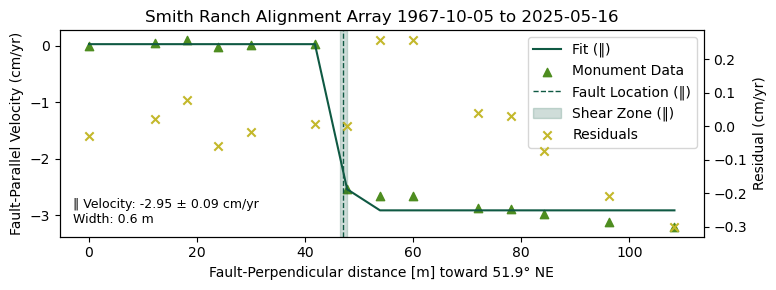

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-ref['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-ref['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:41: RuntimeWarning: invalid value encountered in sqrt
  sig_p

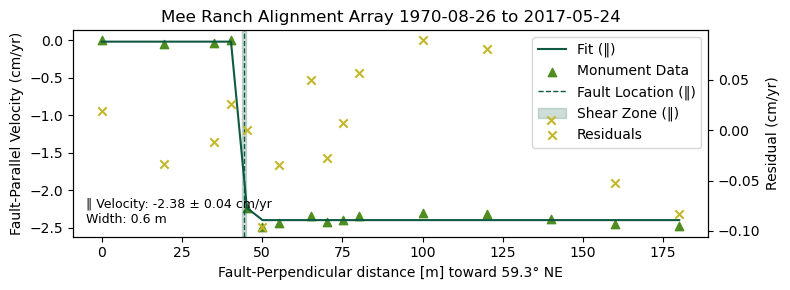

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-ref['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-ref['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:41: RuntimeWarning: invalid value encountered in sqrt
  sig_p

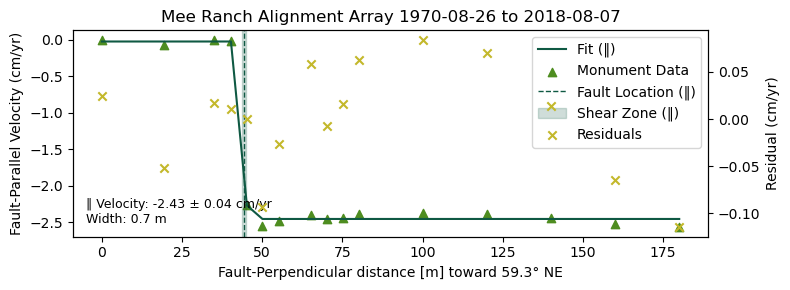

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-ref['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-ref['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:41: RuntimeWarning: invalid value encountered in sqrt
  sig_p

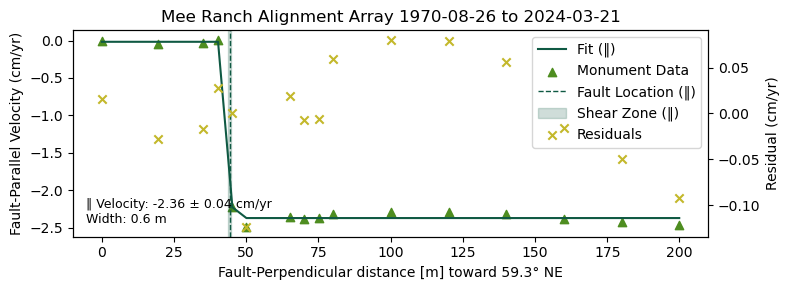

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-ref['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-ref['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:41: RuntimeWarning: invalid value encountered in sqrt
  sig_p

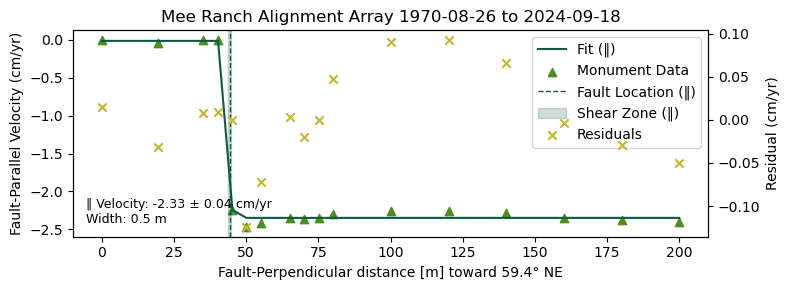

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-ref['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-ref['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:41: RuntimeWarning: invalid value encountered in sqrt
  sig_p

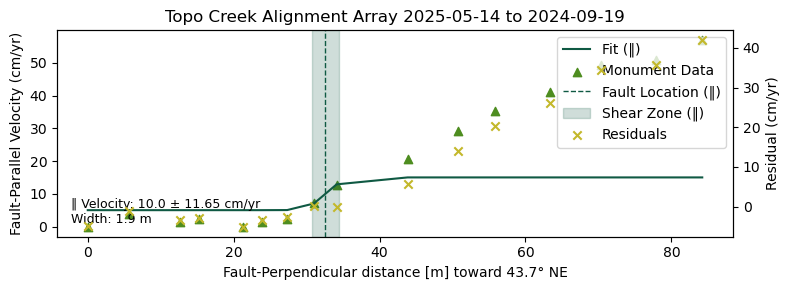

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-ref['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-ref['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2190043969.py:26: RuntimeWarning: divide by zero encountered in divide
  pa

ValueError: array must not contain infs or NaNs

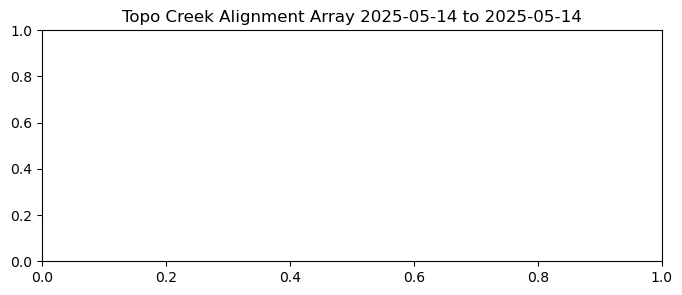

In [11]:

## LONG TERM RATES

for f,aa in zip(flist,aaDict.keys()):
    AA = pd.read_csv(f,
                 comment='#',sep='\t')
    for sdate in np.unique(AA['Survey Date']):
        dt = (pd.to_datetime(sdate)-pd.to_datetime(aaDict[aa]['Install Date'])).days/365.25

        plt.figure(figsize=(8,3))
        plt.title(f'{aa} Alignment Array {aaDict[aa]['Install Date']} to {sdate}')
        p = AA[AA['Survey Date'] == sdate]
        # Drop bad stations
        if aaDict[aa]['Omit'] is not None:
            p = p[~p['MonumentID'].isin(aaDict[aa]['Omit'])]
        # find zero reference point
        ref = p[p['MonumentID'] == aaDict[aa]['Ref Station']]
        p['rel_E'] = p['Easting (m)']-ref['Easting (m)'].values
        p['rel_N'] = p['Northing (m)']-ref['Northing (m)'].values
        p = p.sort_values(by='rel_E', ascending=True)
        # Estimate original azimuth of stations from stable stations
        ref = p[p['MonumentID'].isin(aaDict[aa]['linest'])]
        slope, b = np.polyfit(ref.rel_E,ref.rel_N,deg=1)
        fault_az = (-np.atan(slope)*180/np.pi)
        aaDict[aa]['fault_az'] = fault_az
        
        par_vel = np.array(list(map(tt.projectParPerp, p.rel_N, p.rel_E, [fault_az] * len(p)))).reshape(len(p),2)[:,0] / dt * 100 # cm/yr
        perp_locs = np.array(list(map(tt.projectParPerp, p.rel_N, p.rel_E, [fault_az] * len(p)))).reshape(len(p),2)[:,1]
        # fit erf
        bounds = [(-10,-10,int(min(perp_locs)),0),
            (10,10,int(max(perp_locs)),int(max(perp_locs)))]
        popt, pcov = curve_fit(fault_curve_fit_noslope, perp_locs, par_vel, bounds=bounds,maxfev=100000)
    
        # Store values
        aaDict[aa]['par_total_offset'] = popt[1]
        aaDict[aa]['par_fault_loc'] = popt[2]
        aaDict[aa]['par_shear_width'] = popt[3]
        aaDict[aa]['par_near_offset'] = fault_curve_fit_noslope(popt[2] + popt[3], *popt) - fault_curve_fit_noslope(popt[2] - popt[3], *popt)
        aaDict[aa]['par_total_offset_sig'] = np.sqrt(pcov[1, 1])
        aaDict[aa]['par_fault_loc_sig'] = np.sqrt(pcov[2, 2])
        aaDict[aa]['par_shear_width_sig'] = np.sqrt(pcov[3, 3])
        sig_post = np.sqrt(np.sum((par_vel - fault_curve_fit_noslope(perp_locs,*popt)**2)/(len(par_vel)-len(popt))))
        aaDict[aa]['par_fit_sig'] = sig_post
    
        ax1 = plt.gca()
        ax1.plot(perp_locs, fault_curve_fit_noslope(perp_locs, *popt), color="#0F5943", linewidth=1.5, label='Fit (‖)')
        ax1.scatter(perp_locs, par_vel, color="#4E8D20", marker='^', label='Monument Data')

        # Add fault zone indicators
        fault_loc = aaDict[aa]['par_fault_loc']
        shear_width = aaDict[aa]['par_shear_width']
        ax1.axvline(fault_loc, color="#0F5943", linestyle='--', linewidth=1, label='Fault Location (‖)')
        ax1.axvspan(fault_loc - shear_width, fault_loc + shear_width, color="#0F5943", alpha=0.2, label='Shear Zone (‖)')

        # Axis labels
        ax1.set_xlabel(f'Fault-Perpendicular distance [m] toward {np.round(fault_az + 90, 1)}° NE')
        ax1.set_ylabel('Fault-Parallel Velocity (cm/yr)')

        # Residuals on secondary axis
        ax2 = ax1.twinx()
        resid = par_vel - fault_curve_fit_noslope(perp_locs, *popt)
        ax2.scatter(perp_locs, resid, color="#C3B82B", marker='x', label='Residuals')
        ax2.set_ylabel('Residual (cm/yr)')

        # Text annotation in bottom-left
        offset = np.round(popt[1], 2)
        offset_sig = np.round(np.sqrt(pcov[1, 1]), 2)
        width = np.round(popt[3], 1)
        ax1.text(0.02, 0.05,
                 f'‖ Velocity: {offset} ± {offset_sig} cm/yr\nWidth: {width} m',
                 transform=ax1.transAxes, fontsize=9, verticalalignment='bottom')

        # Combine legends
        handles1, labels1 = ax1.get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right')

        plt.tight_layout()
        #plt.savefig(f'/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Desktop/Manuscripts/CSAF/AA_profiles/{aa}_Alignment_Array_{aaDict[aa]['Install Date']}_to_{sdate}.png',dpi=300)
        plt.show()


Bagby Ranch
Monarch Peak


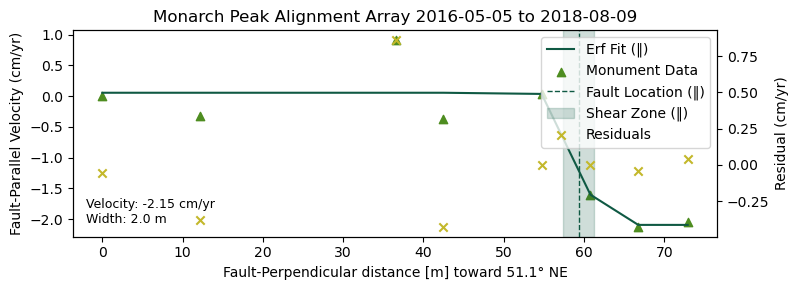

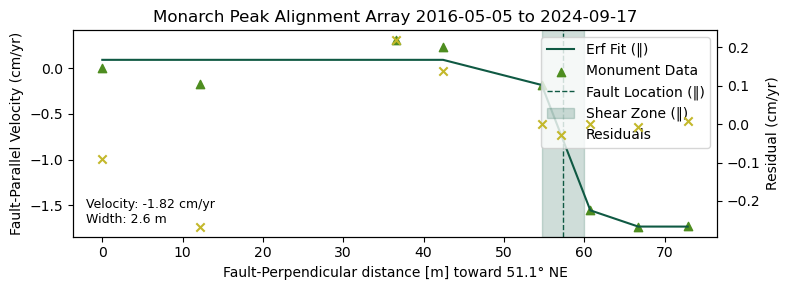

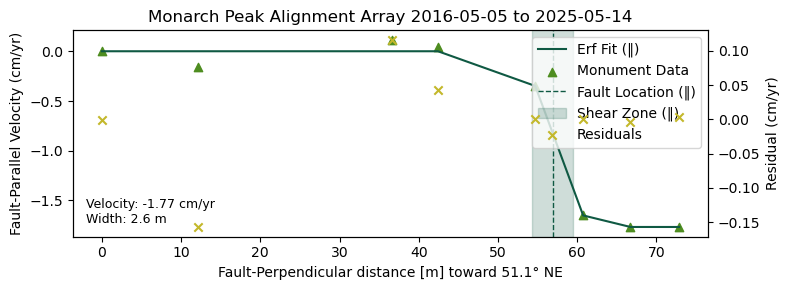

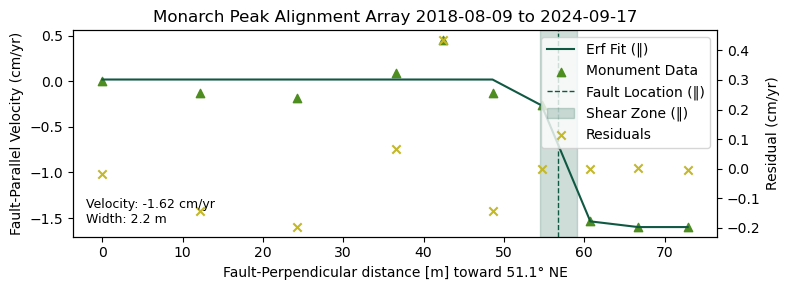

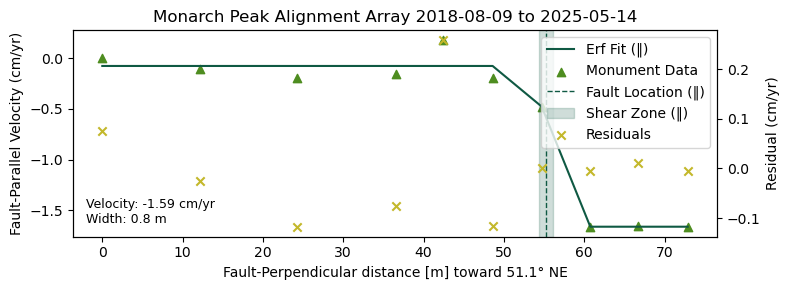

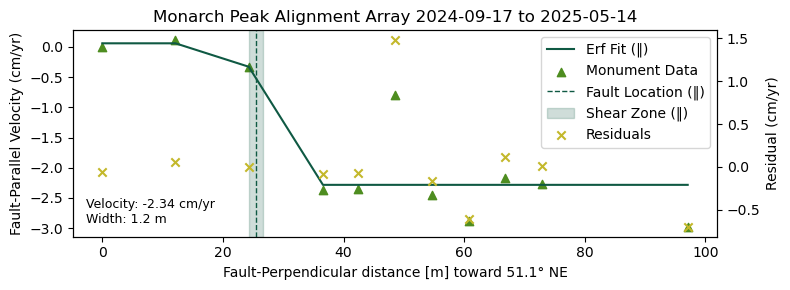

DeAlvarez Ranch


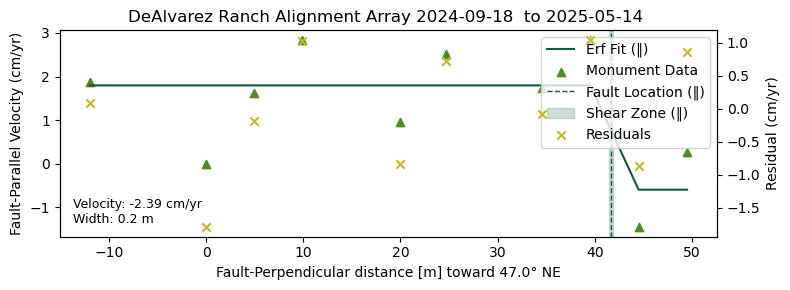

Slack Canyon
Durham Ranch
Smith Ranch
Mee Ranch


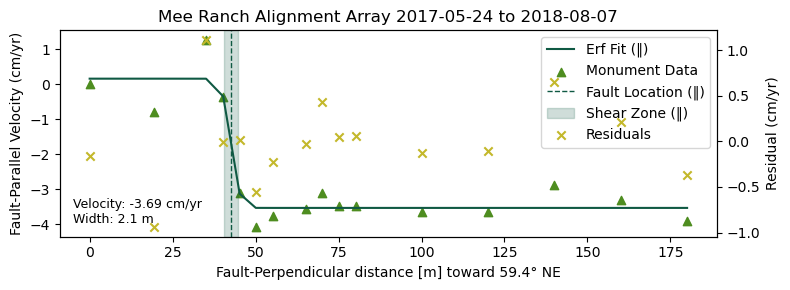

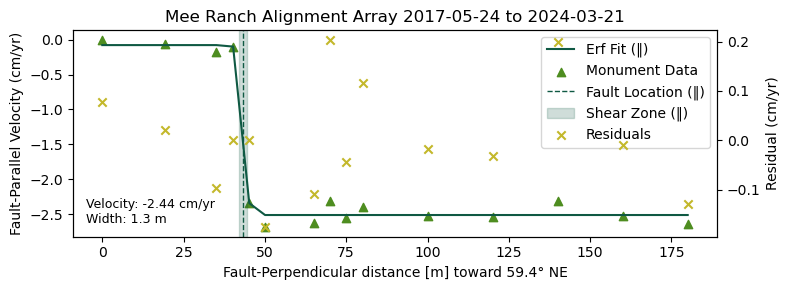

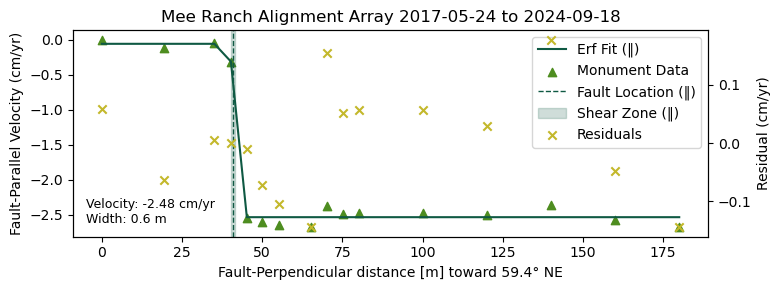

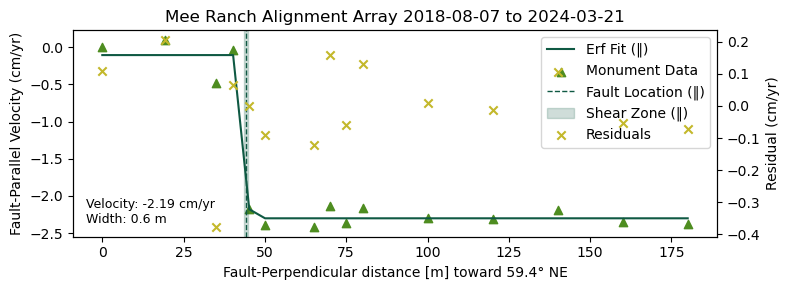

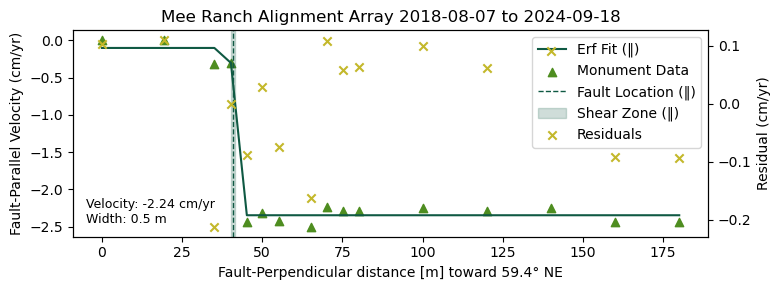

0.49555099247091033
Topo Creek


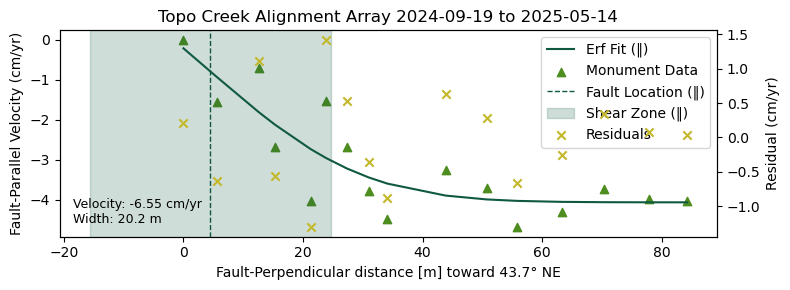

In [9]:
for f,aa in zip(flist,aaDict.keys()):
    print(aa)
    AA = pd.read_csv(f,comment='#',sep='\t')
    
    # Drop bad stations
    if aaDict[aa]['Omit'] is not None:
        AA = AA[~AA['MonumentID'].isin(aaDict[aa]['Omit'])]
    
    # Fault azimuth from prev calc
    fault_az = aaDict[aa]['fault_az'] 

    dates = np.unique(AA['Survey Date'].values)
    for i in range(len(dates)):
        for j in range(i+1, len(dates)):
            d1 = AA[AA['Survey Date'] == dates[i]].sort_values(by='Easting (m)',ascending=True)
            d2 = AA[AA['Survey Date'] == dates[j]].sort_values(by='Easting (m)',ascending=True)
            # Use repeat monuments
            valid_mons = np.intersect1d(d1['MonumentID'].values,d2['MonumentID'].values)
            d1 = d1[d1['MonumentID'].isin(valid_mons)]
            d2 = d2[d2['MonumentID'].isin(valid_mons)]
            dt = (pd.to_datetime(dates[j]) - pd.to_datetime(dates[i])).days / 365.25
            if dt < 0.5:
                print(dt)
                continue
            dE = d2['Easting (m)'].values - d1['Easting (m)'].values
            dE -= dE[d1['MonumentID'] == aaDict[aa]['Ref Station']]
            dN = d2['Northing (m)'].values- d1['Northing (m)'].values
            dN -= dN[d1['MonumentID'] == aaDict[aa]['Ref Station']]

            relE = d2['Easting (m)'].values 
            relE -= relE[d1['MonumentID'] == aaDict[aa]['Ref Station']]
            relN = d2['Northing (m)'].values
            relN -= relN[d1['MonumentID'] == aaDict[aa]['Ref Station']]

            # Project velocities
            par_vel = np.array(list(map(tt.projectParPerp, dN, dE, [fault_az] * len(dN)))).reshape(len(dN), 2)[:, 0] / dt * 100  # cm/yr
            perp_locs = np.array(list(map(tt.projectParPerp, relN, relE, [fault_az] * len(dN)))).reshape(len(dN), 2)[:, 1]
    
            # Fit erf
            bounds = [(-10, -10, int(min(perp_locs)), 0),
                 (10, 10, int(max(perp_locs)), int(max(perp_locs)))]
            popt, pcov = curve_fit(fault_curve_fit_noslope, perp_locs, par_vel, bounds=bounds, maxfev=100000)
    
            # Store values
            aaDict[aa][f'{dates[i]}_{dates[j]}_par_total_offset'] = popt[1]
            aaDict[aa][f'{dates[i]}_{dates[j]}_par_fault_loc'] = popt[2]
            aaDict[aa][f'{dates[i]}_{dates[j]}_par_shear_width'] = popt[3]
            aaDict[aa][f'{dates[i]}_{dates[j]}_par_near_offset'] = fault_curve_fit_noslope(popt[2] + popt[3], *popt) - fault_curve_fit_noslope(popt[2] - popt[3], *popt)
            aaDict[aa][f'{dates[i]}_{dates[j]}_par_total_offset_sig'] = np.sqrt(pcov[1, 1])
            aaDict[aa][f'{dates[i]}_{dates[j]}_par_fault_loc_sig'] = np.sqrt(pcov[2, 2])
            aaDict[aa][f'{dates[i]}_{dates[j]}_par_shear_width_sig'] = np.sqrt(pcov[3, 3])
            sig_post = np.sqrt(np.sum((par_vel - fault_curve_fit_noslope(perp_locs,*popt))**2/(len(par_vel)-len(popt))))
            aaDict[aa][f'{dates[i]}_{dates[j]}_par_fit_sig'] = sig_post

            # Plotting
            plt.figure(figsize=(8, 3))
            plt.title(f'{aa} Alignment Array {dates[i]} to {dates[j]}')
            plt.plot(perp_locs, fault_curve_fit_noslope(perp_locs, *popt),
                     color="#0F5943", linewidth=1.5, label='Erf Fit (‖)')
            plt.scatter(perp_locs, par_vel, color="#4E8D20", marker='^', label='Monument Data')

            # Fault fit graphics
            plt.axvline(popt[2], color="#0F5943", linestyle='--', linewidth=1, label='Fault Location (‖)')
            plt.axvspan(popt[2] - popt[3], popt[2] + popt[3], color="#0F5943", alpha=0.2, label='Shear Zone (‖)')

            plt.xlabel(f'Fault-Perpendicular distance [m] toward {np.round(fault_az + 90, 1)}° NE')
            plt.ylabel('Fault-Parallel Velocity (cm/yr)')

            # Plot residuals on a second axis
            ax1 = plt.gca()
            ax2 = plt.twinx()
            resid = par_vel - fault_curve_fit_noslope(perp_locs, *popt)
            ax2.scatter(perp_locs, resid, color="#C3B82B", marker='x', label='Residuals')
            ax2.set_ylabel('Residual (cm/yr)')

            # Add offset and width text
            offset = np.round(popt[1], 2)
            shear_width = np.round(popt[3], 1)
            plt.text(0.02, 0.05, f'Velocity: {offset} cm/yr\nWidth: {shear_width} m',
                     transform=ax1.transAxes, fontsize=9, verticalalignment='bottom')

            # Combine legends
            lines1, labels1 = ax1.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

            plt.tight_layout()
            plt.savefig(f'/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Desktop/Manuscripts/CSAF/AA_profiles/{aa}_Alignment_Array_{dates[i]}_to_{dates[j]}_MonumentsAsIndependent.png',dpi=300)
            plt.show()




In [127]:
parlocs

array([ 0.        ,  0.00584376, -0.03858127, -0.01893937, -0.00953043,
       -0.02892312,  0.02332221, -1.25326002, -1.26639851, -1.24845047,
       -1.2473753 , -1.31096049, -1.29519716])

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:62: RuntimeWarning: invalid value encountered in divide
  stAA['Short-term East Velocity (cm/yr)'] = (tmpAA['rel_E'].values - stAA['rel_E'].values) / dt *100
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:63: RuntimeWarning: invalid value encountered in divide
  stAA['Short-term North Velocity (cm/yr)'] = (tmpAA['rel_N'].values - stAA['rel_N'].values) / dt *100


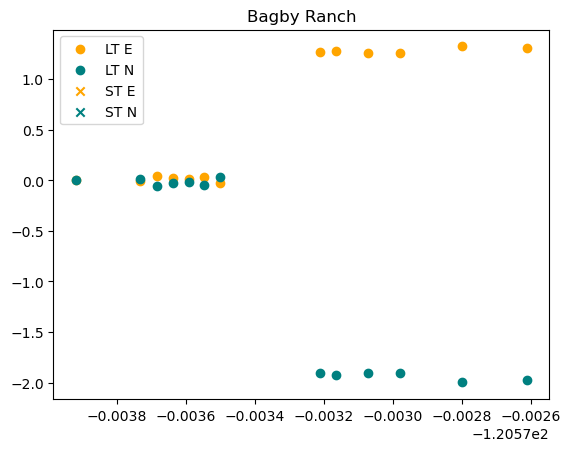

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltAA['rel_E'] = ltAA['Easting (m)']-refpt['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltAA['rel_N'] = ltAA['Northing (m)']-refpt['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:52: SettingWithCopyWarning: 
A value is tryin

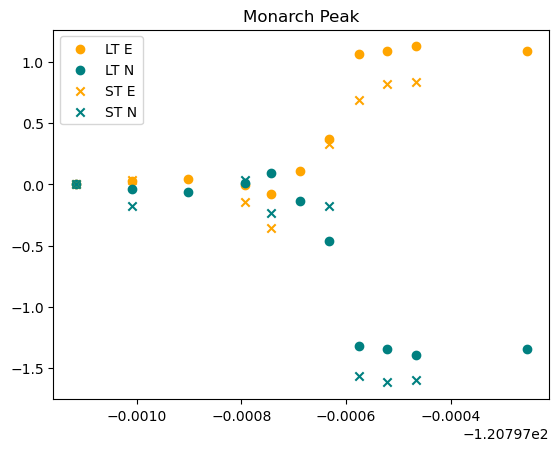

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltAA['rel_E'] = ltAA['Easting (m)']-refpt['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltAA['rel_N'] = ltAA['Northing (m)']-refpt['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:52: SettingWithCopyWarning: 
A value is tryin

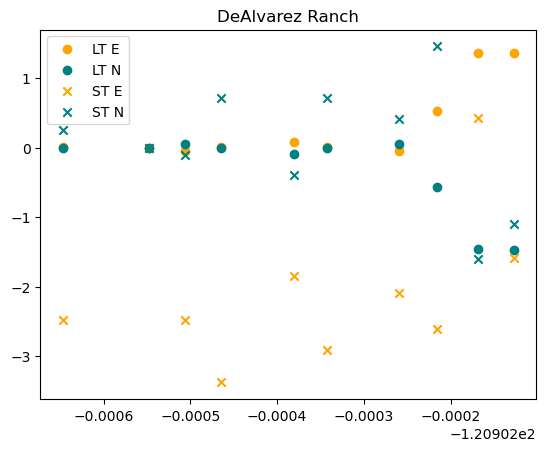

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:62: RuntimeWarning: invalid value encountered in divide
  stAA['Short-term East Velocity (cm/yr)'] = (tmpAA['rel_E'].values - stAA['rel_E'].values) / dt *100
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:63: RuntimeWarning: invalid value encountered in divide
  stAA['Short-term North Velocity (cm/yr)'] = (tmpAA['rel_N'].values - stAA['rel_N'].values) / dt *100


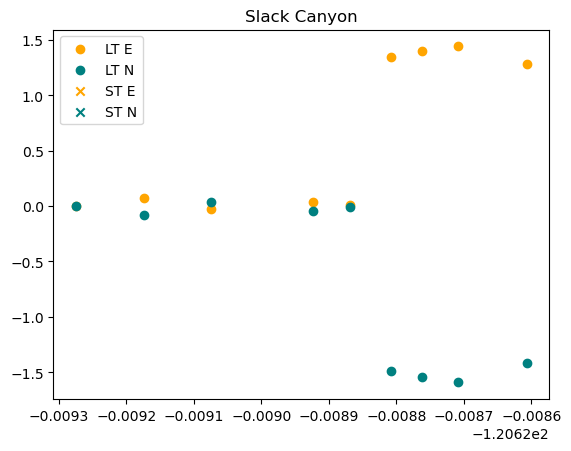

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:62: RuntimeWarning: invalid value encountered in divide
  stAA['Short-term East Velocity (cm/yr)'] = (tmpAA['rel_E'].values - stAA['rel_E'].values) / dt *100
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:63: RuntimeWarning: invalid value encountered in divide
  stAA['Short-term North Velocity (cm/yr)'] = (tmpAA['rel_N'].values - stAA['rel_N'].values) / dt *100


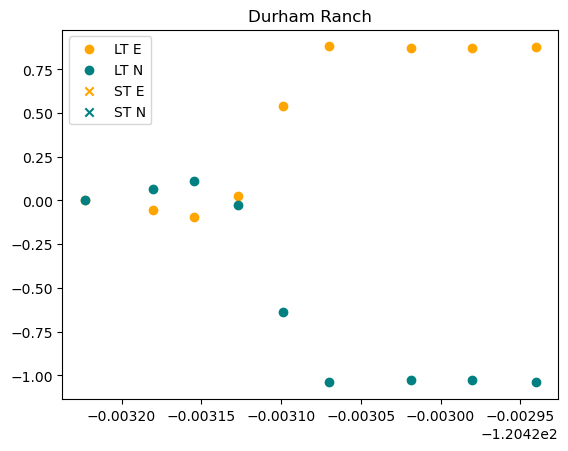

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:62: RuntimeWarning: invalid value encountered in divide
  stAA['Short-term East Velocity (cm/yr)'] = (tmpAA['rel_E'].values - stAA['rel_E'].values) / dt *100
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:63: RuntimeWarning: invalid value encountered in divide
  stAA['Short-term North Velocity (cm/yr)'] = (tmpAA['rel_N'].values - stAA['rel_N'].values) / dt *100


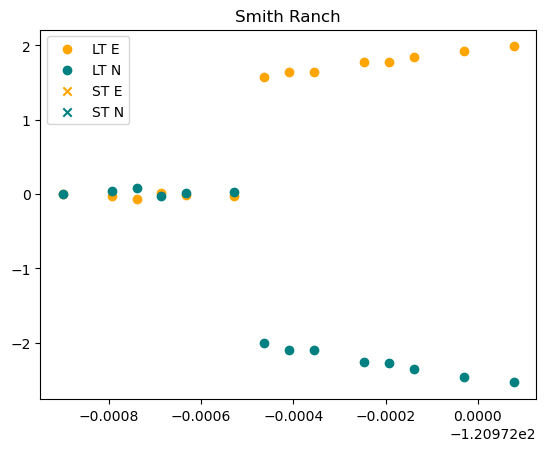

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltAA['rel_E'] = ltAA['Easting (m)']-refpt['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltAA['rel_N'] = ltAA['Northing (m)']-refpt['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:52: SettingWithCopyWarning: 
A value is tryin

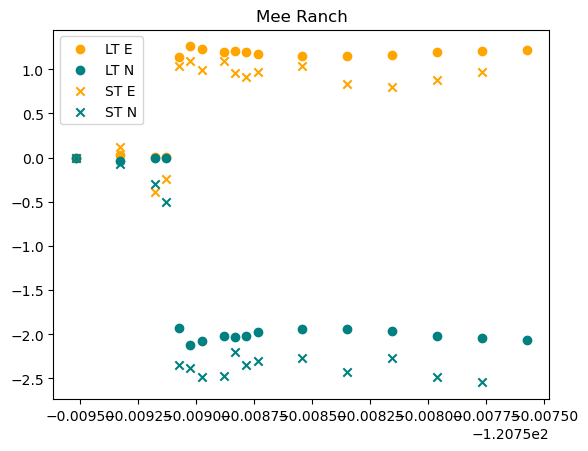

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltAA['rel_E'] = ltAA['Easting (m)']-refpt['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltAA['rel_N'] = ltAA['Northing (m)']-refpt['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_97778/2177016618.py:42: RuntimeWarning: divide by zero encountere

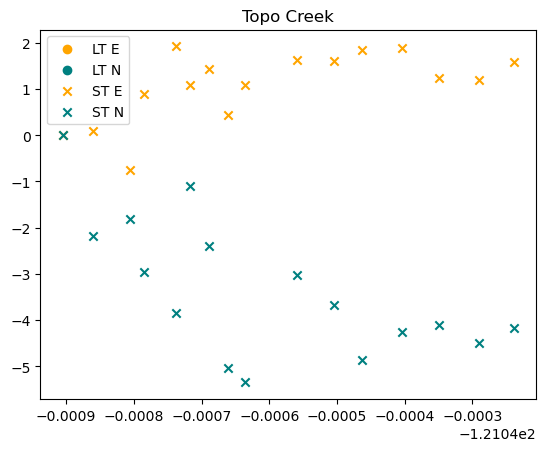

/Users/chanagan/Documents/GitHub/ImageryResources/Functions/TiffTools.py:14: RuntimeWarning: invalid value encountered in scalar add
  perp = -1*ns*np.sin(theta)+ew*np.cos(theta)


In [142]:
## Make file with velocities of individual monuments
######## HEADER
# This file contains the latest long- and short- term east and north velocities of found alignment arrays from Burford and Harsh (1980) from RTK GNSS surveys. 
# Latitude and longitude in degrees are referenced to WGS84 (EPSG4326) from latest RTK GNSS survey.
# Long term Velocities are calculated for each monument assuming original linearity of the array perpendicular to the fault, and no fault perpendicular motion.
# Original array direction is calculated from subset of monuments on SW side of fault. 
# Short term velocities are the difference of the last and first RTK survey east and north locations divided by time. Not all have been revisited.
# No data values are -9999. Not all monuments still exist. 

name, monid, installdate, az, dfs, dls, lat, lon, ltE, ltN, stE, stN = np.empty(0), np.empty(0), np.empty(0), np.empty(0), np.empty(0), np.empty(0), np.empty(0), np.empty(0), np.empty(0), np.empty(0), np.empty(0), np.empty(0)

for f,aa in zip(flist,aaDict.keys()):
    # Read in the array
    AA = pd.read_csv(f,
                 comment='#',sep='\t')
    # Drop bad stations
    if aaDict[aa]['Omit'] is not None:
        AA = AA[~AA['MonumentID'].isin(aaDict[aa]['Omit'])]
    # Select monuments from last survey 
    bool = (pd.to_datetime(AA['Survey Date']) == pd.to_datetime(AA['Survey Date']).max())
    ltAA = AA[bool]

    # find zero reference point
    refpt = ltAA[ltAA['MonumentID'] == aaDict[aa]['Ref Station']]
    ltAA['rel_E'] = ltAA['Easting (m)']-refpt['Easting (m)'].values
    ltAA['rel_N'] = ltAA['Northing (m)']-refpt['Northing (m)'].values
    ltAA = ltAA.sort_values(by='rel_E', ascending=True)
    # Estimate original azimuth of stations from stable stations
    ref = ltAA[ltAA['MonumentID'].isin(aaDict[aa]['linest'])]
    slope, b = np.polyfit(ref.rel_E,ref.rel_N,deg=1)
    fault_az =  aaDict[aa]['fault_az'] # from stable monuments one side of fault

    dt = (pd.to_datetime(ltAA['Survey Date'].iloc[0]) - pd.to_datetime(aaDict[aa]['Install Date'])).days / 365.25

    # Assume original linearity of the array and only fault parallel motion to find what long term E/N velocities are
    perplocs = np.zeros(len(ltAA))
    parlocs = np.array(list(map(tt.projectParPerp, ltAA['rel_N'], ltAA['rel_E'], [fault_az] * len(ltAA)))).reshape(len(ltAA), 2)[:, 0]
    n = np.array(list(map(tt.projectParPerp, parlocs, perplocs, [-fault_az] * len(ltAA)))).reshape(len(ltAA), 2)[:, 0] 
    e = np.array(list(map(tt.projectParPerp, parlocs, perplocs, [-fault_az] * len(ltAA)))).reshape(len(ltAA), 2)[:, 1] 

    # Calculate velocity of long term 
    ltAA['Long-term East Velocity (cm/yr)'] = e / dt *100
    ltAA['Long-term North Velocity (cm/yr)'] = n / dt *100

    # If more than one rtk survey exists
    #if len(np.unique(AA['Survey Date'])) > 1:
    # Short-term velocity
    bool = (pd.to_datetime(AA['Survey Date']) == pd.to_datetime(AA['Survey Date']).min())
    stAA = AA[bool]
    # remove first point location
    refpt = stAA[stAA['MonumentID'] == aaDict[aa]['Ref Station']]
    stAA['rel_E'] = stAA['Easting (m)']-refpt['Easting (m)'].values
    stAA['rel_N'] = stAA['Northing (m)']-refpt['Northing (m)'].values
    stAA = stAA.sort_values(by='rel_E', ascending=True)
    # Boolean with repeat stations
    mons = np.intersect1d(stAA['MonumentID'],ltAA['MonumentID'])
    stAA = stAA[stAA['MonumentID'].isin(mons)]
    tmpAA = ltAA[ltAA['MonumentID'].isin(mons)]

    dt = (pd.to_datetime(tmpAA['Survey Date'].iloc[0]) - pd.to_datetime(stAA['Survey Date'].iloc[0])).days / 365.25
    # Calculate velocity
    stAA['Short-term East Velocity (cm/yr)'] = (tmpAA['rel_E'].values - stAA['rel_E'].values) / dt *100
    stAA['Short-term North Velocity (cm/yr)'] = (tmpAA['rel_N'].values - stAA['rel_N'].values) / dt *100

    tmpAA = pd.merge(ltAA,stAA,on='MonumentID',how='outer')

    plt.figure()
    plt.title(aa)
    plt.scatter(tmpAA['Longitude_x'].values,tmpAA['Long-term East Velocity (cm/yr)'].values,c='orange',label='LT E')
    plt.scatter(tmpAA['Longitude_x'].values,tmpAA['Long-term North Velocity (cm/yr)'].values,c='teal',label='LT N')
    plt.scatter(tmpAA['Longitude_x'].values,tmpAA['Short-term East Velocity (cm/yr)'].values,marker='x',c='orange',label='ST E')
    plt.scatter(tmpAA['Longitude_x'].values,tmpAA['Short-term North Velocity (cm/yr)'].values,marker='x',c='teal',label='ST N')
    plt.legend()
    plt.show()

    name = np.append(name,[aa]*len(tmpAA))
    monid = np.append(monid,tmpAA['MonumentID'].values)
    installdate = np.append(installdate,[aaDict[aa]['Install Date']]*len(tmpAA))
    az = np.append(az,[fault_az]*len(tmpAA))
    dfs = np.append(dfs,tmpAA['Survey Date_y'].values) 
    dls = np.append(dls,tmpAA['Survey Date_x'].values) 
    lat = np.append(lat,tmpAA['Latitude_x'].values) 
    lon = np.append(lon,tmpAA['Longitude_x'].values) 
    ltE = np.append(ltE,tmpAA['Long-term East Velocity (cm/yr)'].values) 
    ltN = np.append(ltN,tmpAA['Long-term North Velocity (cm/yr)'].values) 
    stE = np.append(stE,tmpAA['Short-term East Velocity (cm/yr)'].values) 
    stN = np.append(stN,tmpAA['Short-term North Velocity (cm/yr)'].values)

df = pd.DataFrame({})
df['Name'] = name
df['Monument ID'] = monid
df['Install Date'] = installdate
df['Fault Azimuth'] = np.round(az,2)
df['Date of First Survey'] = dfs
df['Date of Last Survey'] = dls
df['Latitude'] = np.round(lat,8)
df['Longitude'] = np.round(lon,8)
df['Long-term East Velocity (cm/yr)'] = np.round(ltE,2)
df['Long-term North Velocity (cm/yr)'] = np.round(ltN,2)
df['Short-term East Velocity (cm/yr)'] = np.round(stE,2)
df['Short-term North Velocity (cm/yr)'] = np.round(stN,2)
df['Long-term Parallel Velocity (cm/yr)'] = np.round(np.array(list(map(tt.projectParPerp, df['Long-term North Velocity (cm/yr)'], df['Long-term East Velocity (cm/yr)'], df['Fault Azimuth']))).reshape(len(df), 2)[:, 0],2)  # cm/yr
df['Short-term Parallel Velocity (cm/yr)'] = np.round(np.array(list(map(tt.projectParPerp, df['Short-term North Velocity (cm/yr)'], df['Short-term East Velocity (cm/yr)'], df['Fault Azimuth']))).reshape(len(df), 2)[:, 0],2)  # cm/yr


df = df.fillna(-9999).replace({pd.NaT: -9999, 'NaT': -9999, 'nan': -9999, 'NaN': -9999})

df.to_csv('/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Desktop/Manuscripts/CSAF/AA_StationCompilations/AlignmentArrayVelocities_NEW.csv',index=False)

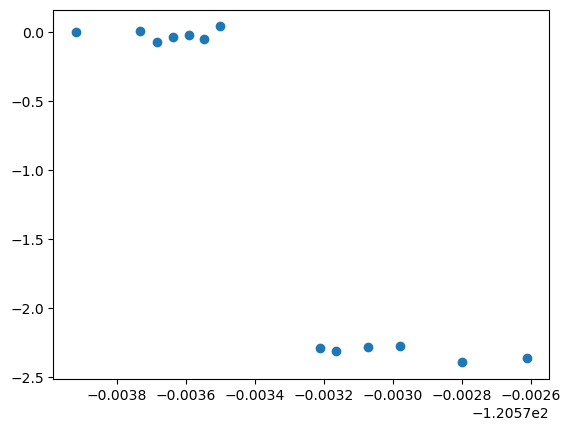

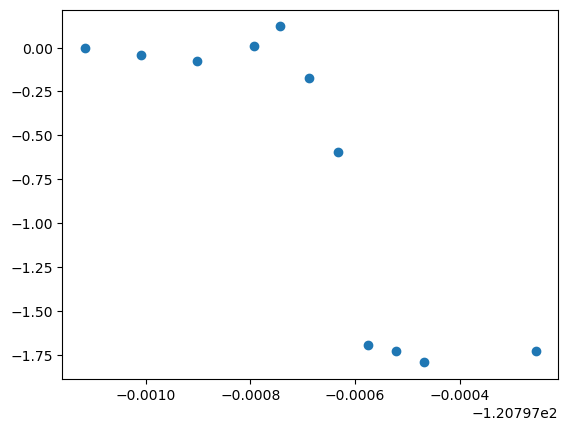

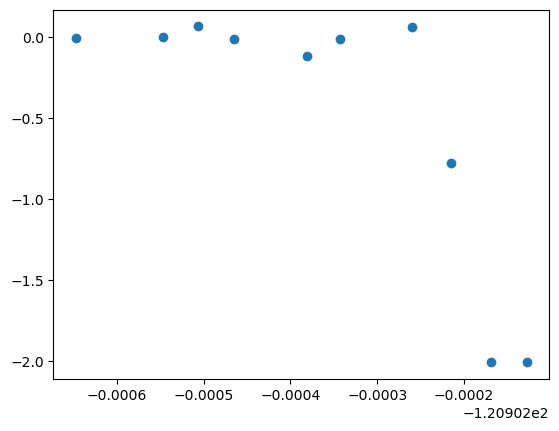

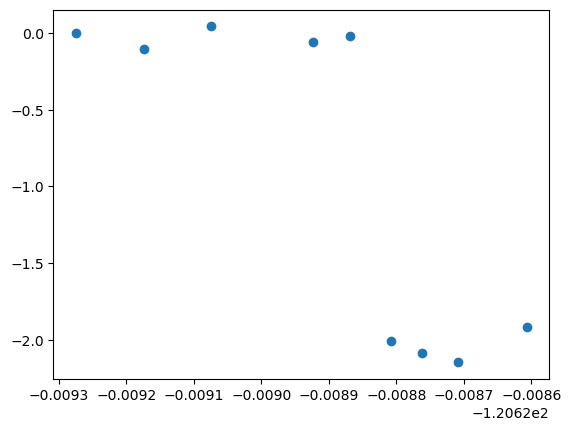

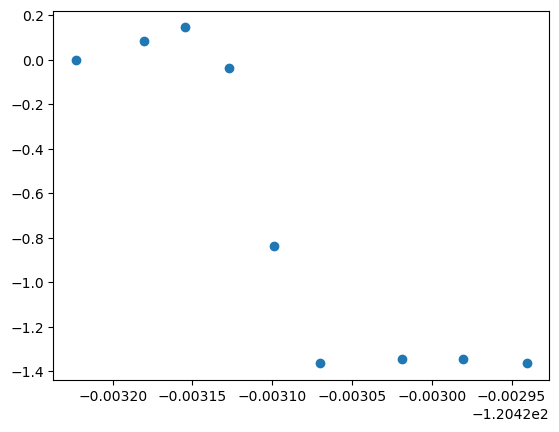

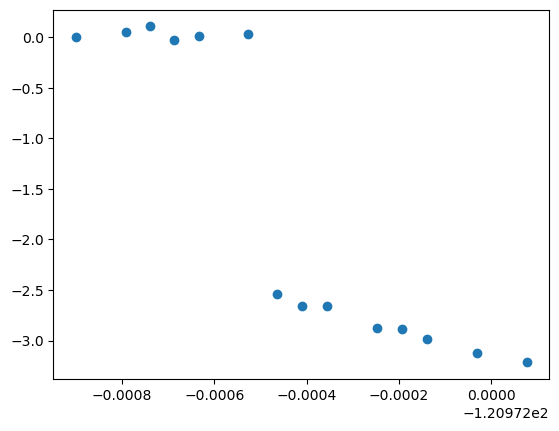

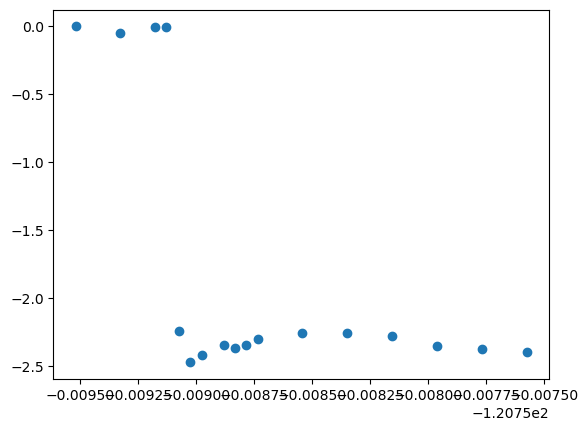

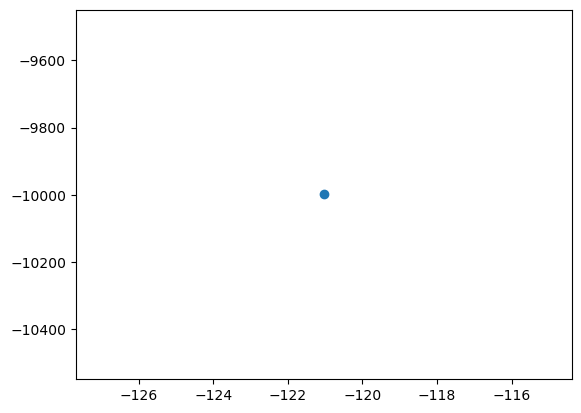

In [139]:
for aa in aaDict.keys():
    tdf = df[df.Name == aa]
    plt.figure()
    plt.scatter(tdf.Longitude,tdf['Long-term Parallel Velocity (cm/yr)'])

In [79]:
df.replace(-9999,np.nan,inplace=True)

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3187231432.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(-9999,np.nan,inplace=True)


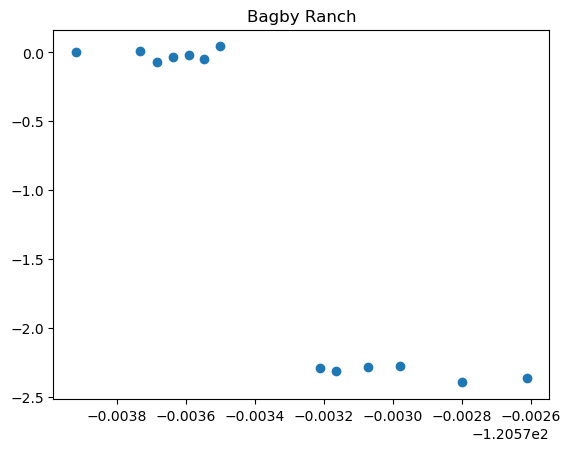

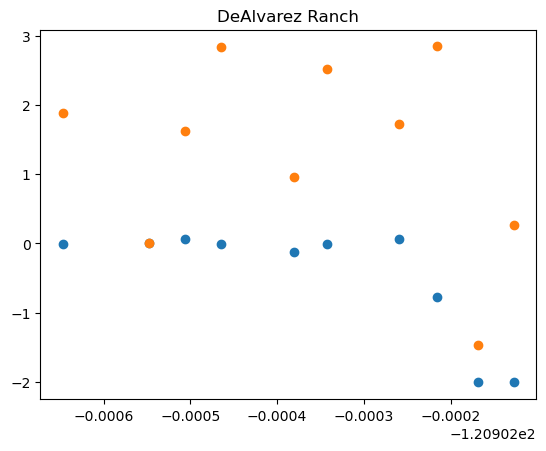

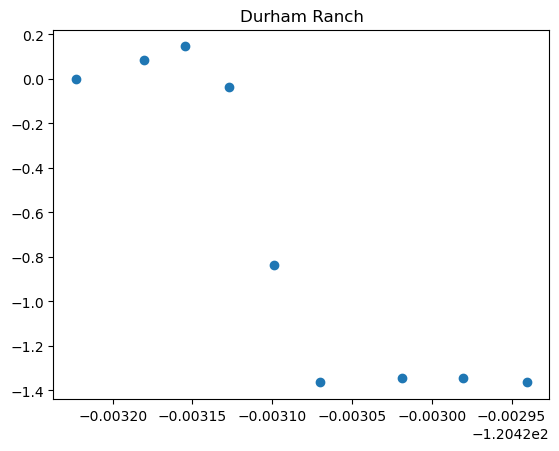

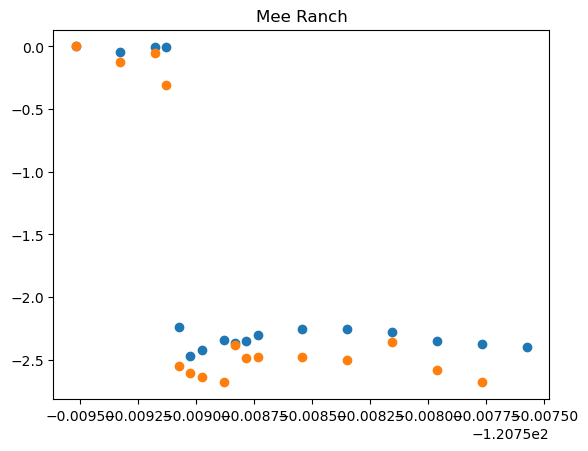

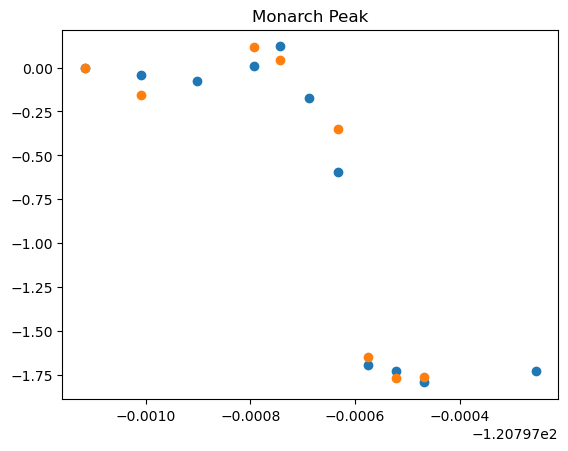

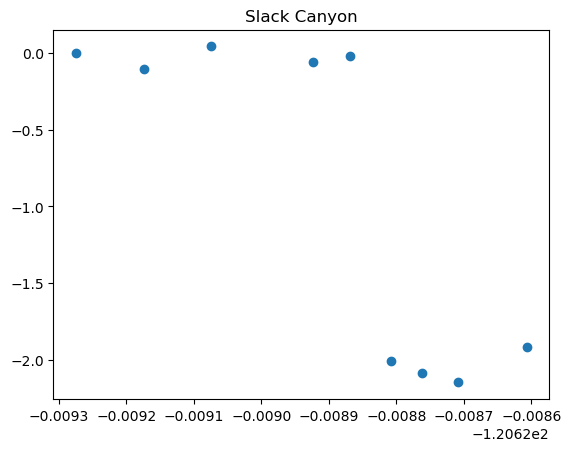

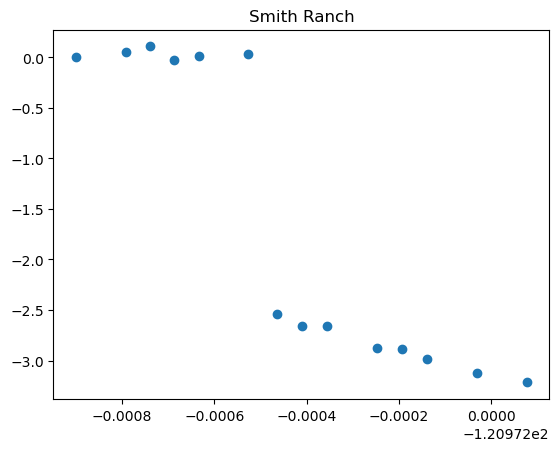

/Users/chanagan/Documents/GitHub/ImageryResources/Functions/TiffTools.py:13: RuntimeWarning: invalid value encountered in scalar add
  par = ns*np.cos(theta)+ew*np.sin(theta)


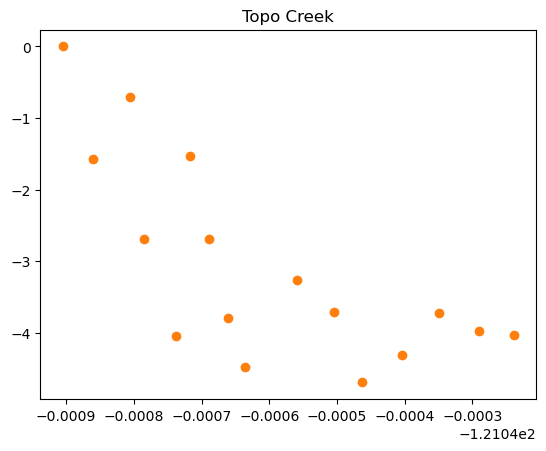

In [86]:
for name in np.unique(df.Name):
    plt.plot()
    plt.title(name)
    p = df[df['Name'] == name]
    # Project velocities
    par_vel = np.array(list(map(tt.projectParPerp, p['Long-term North Velocity (cm/yr)'], p['Long-term East Velocity (cm/yr)'], p['Fault Azimuth']))).reshape(len(p), 2)[:, 0]  # cm/yr
    #perp_locs = np.array(list(map(tt.projectParPerp, relN, relE, [fault_az] * len(dN)))).reshape(len(dN), 2)[:, 1]
    plt.scatter(p.Longitude,par_vel)
    par_vel = np.array(list(map(tt.projectParPerp, p['Short-term North Velocity (cm/yr)'], p['Short-term East Velocity (cm/yr)'], p['Fault Azimuth']))).reshape(len(p), 2)[:, 0]  # cm/yr
    plt.scatter(p.Longitude,par_vel)
    plt.show()

In [77]:
p

,Name,Monument ID,Install Date,Fault Azimuth,Date of First Survey,Date of Last Survey,Latitude,Longitude,Long-term East Velocity (cm/yr),Long-term North Velocity (cm/yr),Short-term East Velocity (cm/yr),Short-term North Velocity (cm/yr)
66,Mee Ranch,MEE04,1970-08-26,-30.648214,2017-05-24 00:00:00,2024-09-18,36.180251,-120.759517,0.000000,0.000000,0.000000,0.000000
67,Mee Ranch,MEE05,1970-08-26,-30.648214,2017-05-24 00:00:00,2024-09-18,36.180337,-120.759329,30.948126,18.283031,0.114738,-0.073760
68,Mee Ranch,MEE06,1970-08-26,-30.648214,2017-05-24 00:00:00,2024-09-18,36.180406,-120.759177,55.808136,33.059314,-0.394754,-0.296407
69,Mee Ranch,MEE07,1970-08-26,-30.648214,2017-05-24 00:00:00,2024-09-18,36.180429,-120.759127,64.012065,37.921484,-0.240404,-0.505395
70,Mee Ranch,MEE08,1970-08-26,-30.648214,2017-05-24 00:00:00,2024-09-18,36.180441,-120.759072,73.058138,40.681714,1.039474,-2.345304
71,Mee Ranch,MEE09,1970-08-26,-30.648214,2017-05-24 00:00:00,2024-09-18,36.180462,-120.759025,80.906750,45.065565,1.092745,-2.384916
72,Mee Ranch,MEE10,1970-08-26,-30.648214,2017-05-24 00:00:00,2024-09-18,36.180484,-120.758975,89.022081,49.935133,0.988934,-2.484629
73,Mee Ranch,MEE12,1970-08-26,-30.648214,2017-05-24 00:00:00,2024-09-18,36.180529,-120.758878,104.969746,59.472104,1.092745,-2.469604
74,Mee Ranch,MEE13,1970-08-26,-30.648214,2017-05-24 00:00:00,2024-09-18,36.180551,-120.758831,112.794867,64.082536,0.954786,-2.201881
75,Mee Ranch,MEE14,1970-08-26,-30.648214,2017-05-24 00:00:00,2024-09-18,36.180572,-120.758783,120.627942,68.746239,0.915174,-2.346670


## Sample Lidar Differences at Same Locations

In [ ]:
# Read the rasters
ns = rasterio.open('/Volumes/ProjectsGarlockCSAF/CSAF_Lidar/MicmacAreaResults/SsResolOpt1/MaskedResults/Velocities/NS_velocity_merged.tif',nodata=-9999)
ew = rasterio.open('/Volumes/ProjectsGarlockCSAF/CSAF_Lidar/MicmacAreaResults/SsResolOpt1/MaskedResults/Velocities/EW_velocity_merged.tif',nodata=-9999)




using 11 year difference for lidar


/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:66: RuntimeWarning: invalid value encountered in sqrt
  sig_post = np.sqrt(np.sum((par_vel - fault_curve_fit_noslope(perp_locs,*popt)**2)/(len(par_vel)-len(popt))))


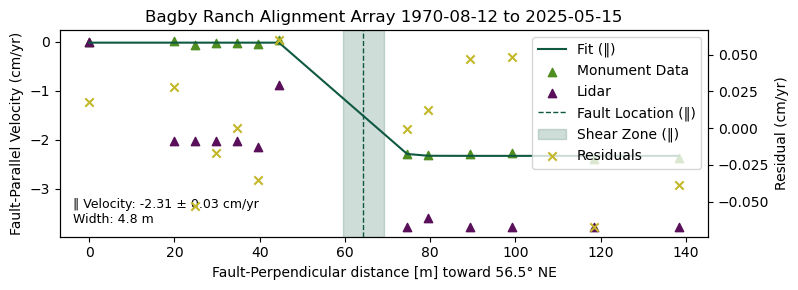

using 11 year difference for lidar


/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-refpt['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-refpt['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:66: RuntimeWarning: invalid value encountered in sqrt
  s

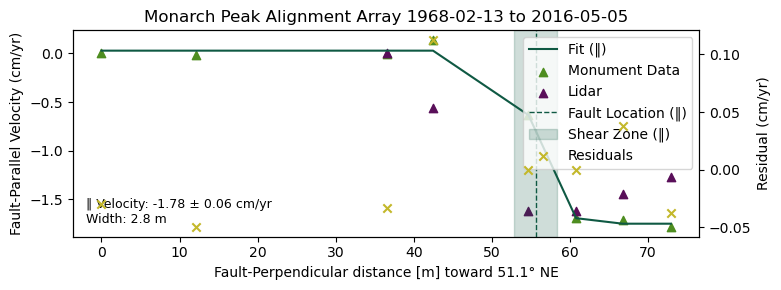

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-refpt['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-refpt['Northing (m)'].values


using 11 year difference for lidar


/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:66: RuntimeWarning: invalid value encountered in sqrt
  sig_post = np.sqrt(np.sum((par_vel - fault_curve_fit_noslope(perp_locs,*popt)**2)/(len(par_vel)-len(popt))))


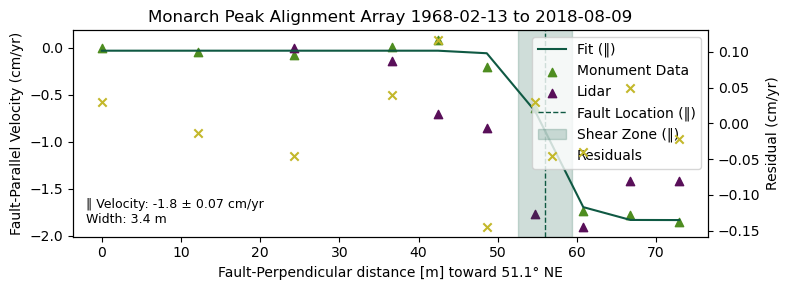

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-refpt['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-refpt['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:66: RuntimeWarning: invalid value encountered in sqrt
  s

using 11 year difference for lidar


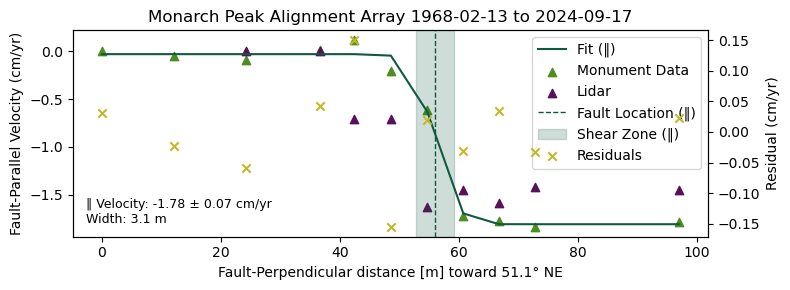

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-refpt['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-refpt['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:66: RuntimeWarning: invalid value encountered in sqrt
  s

using 11 year difference for lidar


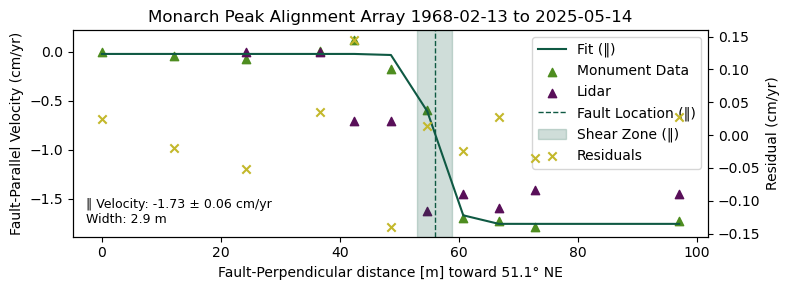

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-refpt['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-refpt['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:66: RuntimeWarning: invalid value encountered in sqrt
  s

using 11 year difference for lidar


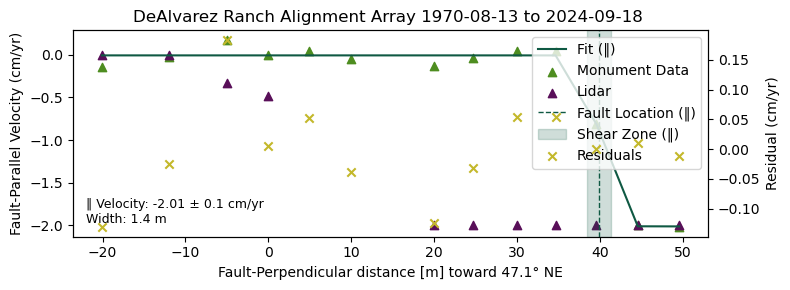

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-refpt['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-refpt['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:66: RuntimeWarning: invalid value encountered in sqrt
  s

using 11 year difference for lidar


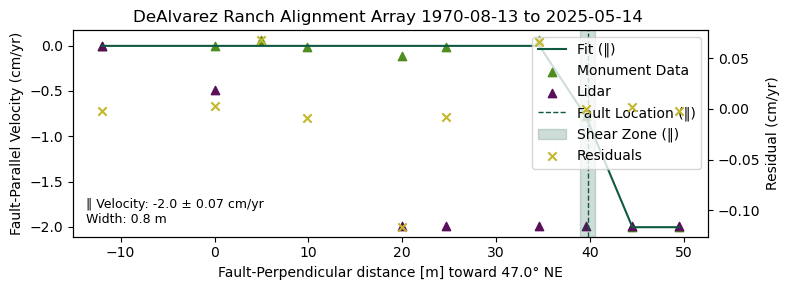

using 11 year difference for lidar


/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:66: RuntimeWarning: invalid value encountered in sqrt
  sig_post = np.sqrt(np.sum((par_vel - fault_curve_fit_noslope(perp_locs,*popt)**2)/(len(par_vel)-len(popt))))


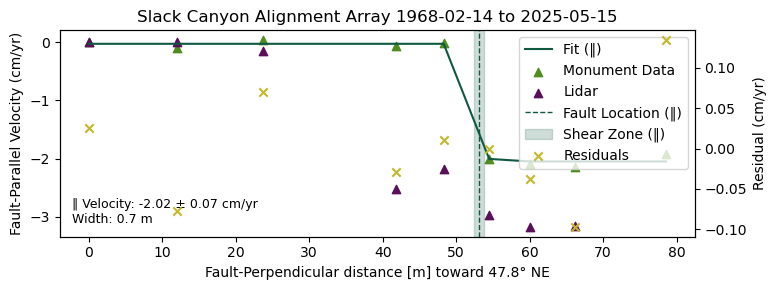

using 11 year difference for lidar


/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:66: RuntimeWarning: invalid value encountered in sqrt
  sig_post = np.sqrt(np.sum((par_vel - fault_curve_fit_noslope(perp_locs,*popt)**2)/(len(par_vel)-len(popt))))


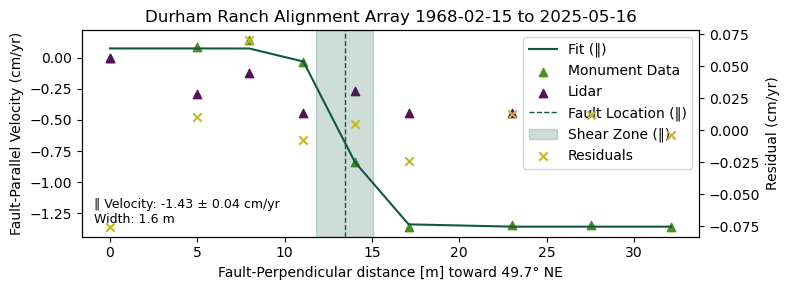

using 11 year difference for lidar


/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:66: RuntimeWarning: invalid value encountered in sqrt
  sig_post = np.sqrt(np.sum((par_vel - fault_curve_fit_noslope(perp_locs,*popt)**2)/(len(par_vel)-len(popt))))


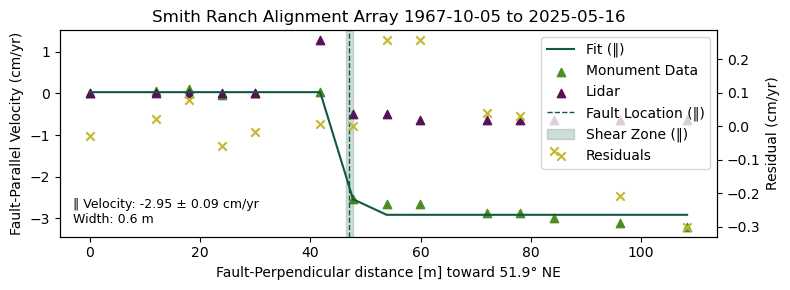

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-refpt['Easting (m)'].values


using 11 year difference for lidar


/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-refpt['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:66: RuntimeWarning: invalid value encountered in sqrt
  sig_post = np.sqrt(np.sum((par_vel - fault_curve_fit_noslope(perp_locs,*popt)**2)/(len(par_vel)-len(popt))))


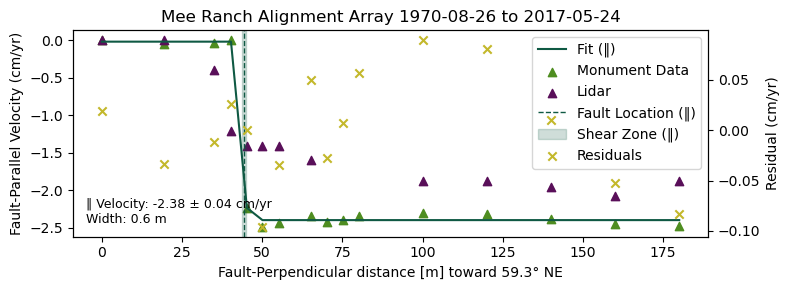

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-refpt['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-refpt['Northing (m)'].values


using 11 year difference for lidar


/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:66: RuntimeWarning: invalid value encountered in sqrt
  sig_post = np.sqrt(np.sum((par_vel - fault_curve_fit_noslope(perp_locs,*popt)**2)/(len(par_vel)-len(popt))))


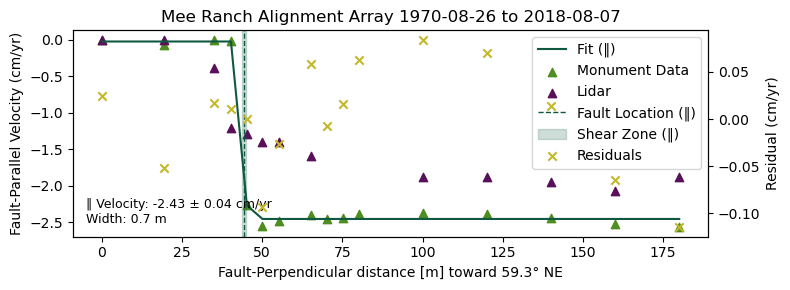

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-refpt['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-refpt['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:66: RuntimeWarning: invalid value encountered in sqrt
  s

using 11 year difference for lidar


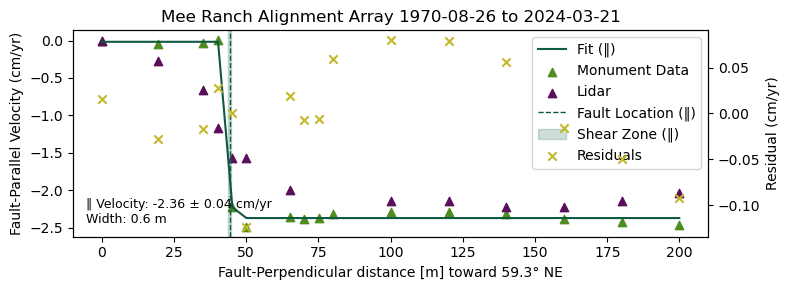

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-refpt['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-refpt['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:66: RuntimeWarning: invalid value encountered in sqrt
  s

using 11 year difference for lidar


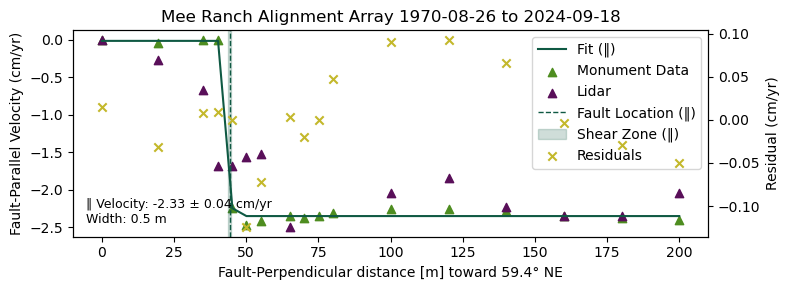

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-refpt['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-refpt['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:66: RuntimeWarning: invalid value encountered in sqrt
  s

using 11 year difference for lidar


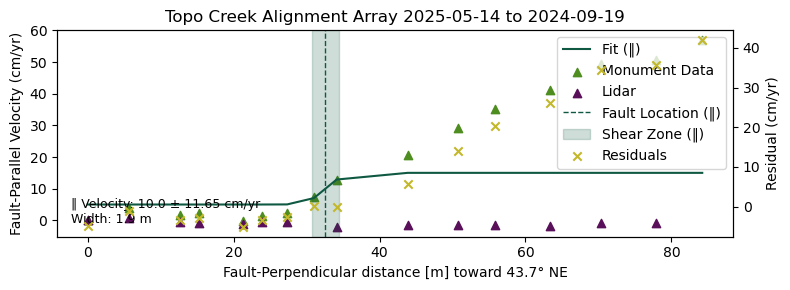

using 11 year difference for lidar


/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_E'] = p['Easting (m)']-refpt['Easting (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['rel_N'] = p['Northing (m)']-refpt['Northing (m)'].values
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_47650/3179852700.py:34: RuntimeWarning: divide by zero encountered in divide


ValueError: array must not contain infs or NaNs

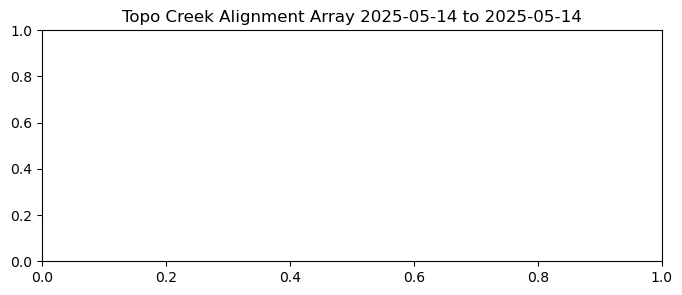

In [32]:
# same thing, but sample lidar
for f,aa in zip(flist,aaDict.keys()):
    AA = pd.read_csv(f,
                 comment='#',sep='\t')
            # Drop bad stations
    if aaDict[aa]['Omit'] is not None:
        AA = AA[~AA['MonumentID'].isin(aaDict[aa]['Omit'])]
    # take max and min northing/easting, sample along rasters
    samp_ns = np.arange(AA['Northing (m)'].min(),AA['Northing (m)'].max(),0.5)
    samp_ew = np.linspace(AA['Easting (m)'].min(),AA['Easting (m)'].max(),num=len(samp_ns))
    pts = np.column_stack([samp_ew,samp_ns])
    ns_samps = np.array([x for x in ns.sample(pts)])
    ns_samps[ns_samps == -9999] = np.nan
    ew_samps = np.array([x for x in ew.sample(pts)])
    ew_samps[ew_samps == -9999] = np.nan

    for sdate in np.unique(AA['Survey Date']):
        dt = (pd.to_datetime(sdate)-pd.to_datetime(aaDict[aa]['Install Date'])).days/365.25

        plt.figure(figsize=(8,3))
        plt.title(f'{aa} Alignment Array {aaDict[aa]['Install Date']} to {sdate}')
        p = AA[AA['Survey Date'] == sdate]
        # find zero reference point
        refpt = p[p['MonumentID'] == aaDict[aa]['Ref Station']]
        p['rel_E'] = p['Easting (m)']-refpt['Easting (m)'].values
        p['rel_N'] = p['Northing (m)']-refpt['Northing (m)'].values
        p = p.sort_values(by='rel_E', ascending=True)
        # Estimate original azimuth of stations from stable stations
        ref = p[p['MonumentID'].isin(aaDict[aa]['linest'])]
        slope, b = np.polyfit(ref.rel_E,ref.rel_N,deg=1)
        fault_az = (-np.atan(slope)*180/np.pi)
        aaDict[aa]['fault_az'] = fault_az
        
        par_vel = np.array(list(map(tt.projectParPerp, p.rel_N, p.rel_E, [fault_az] * len(p)))).reshape(len(p),2)[:,0] / dt * 100 # cm/yr
        perp_locs = np.array(list(map(tt.projectParPerp, p.rel_N, p.rel_E, [fault_az] * len(p)))).reshape(len(p),2)[:,1]

        # Lidar sampling
        ### attempt
        pts = np.column_stack([p['Easting (m)'],p['Northing (m)']])
        ns_samps = np.array([x for x in ns.sample(pts)])
        ns_samps[ns_samps == -9999] = np.nan
        ew_samps = np.array([x for x in ew.sample(pts)])
        ew_samps[ew_samps == -9999] = np.nan
        ns_samps_rel = ns_samps - ns_samps[~np.isnan(ns_samps)][0]
        ew_samps_rel = ew_samps - ew_samps[~np.isnan(ew_samps)][0]
        ####
        par_lid_vel = np.array(list(map(tt.projectParPerp,ns_samps_rel, ew_samps_rel, [fault_az] * len(ns_samps_rel)))).reshape(len(ns_samps_rel),2)[:,0] 
        print('using 11 year difference for lidar')
        perp_lid_locs = np.array(list(map(tt.projectParPerp,samp_ns-refpt['Northing (m)'].values, samp_ew-refpt['Easting (m)'].values, [fault_az] * len(ns_samps_rel)))).reshape(len(ns_samps_rel),2)[:,1] 
        ## attempt
        perp_lid_locs = np.array(list(map(tt.projectParPerp, p.rel_N, p.rel_E, [fault_az] * len(p)))).reshape(len(p),2)[:,1]

        # fit erf
        bounds = [(-10,-10,int(min(perp_locs)),0),
            (10,10,int(max(perp_locs)),int(max(perp_locs)))]
        popt, pcov = curve_fit(fault_curve_fit_noslope, perp_locs, par_vel, bounds=bounds,maxfev=100000)
    
        # Store values
        aaDict[aa]['par_total_offset'] = popt[1]
        aaDict[aa]['par_fault_loc'] = popt[2]
        aaDict[aa]['par_shear_width'] = popt[3]
        aaDict[aa]['par_near_offset'] = fault_curve_fit_noslope(popt[2] + popt[3], *popt) - fault_curve_fit_noslope(popt[2] - popt[3], *popt)
        aaDict[aa]['par_total_offset_sig'] = np.sqrt(pcov[1, 1])
        aaDict[aa]['par_fault_loc_sig'] = np.sqrt(pcov[2, 2])
        aaDict[aa]['par_shear_width_sig'] = np.sqrt(pcov[3, 3])
        sig_post = np.sqrt(np.sum((par_vel - fault_curve_fit_noslope(perp_locs,*popt)**2)/(len(par_vel)-len(popt))))
        aaDict[aa]['par_fit_sig'] = sig_post
    
        ax1 = plt.gca()
        ax1.plot(perp_locs, fault_curve_fit_noslope(perp_locs, *popt), color="#0F5943", linewidth=1.5, label='Fit (‖)')
        ax1.scatter(perp_locs, par_vel, color="#4E8D20", marker='^', label='Monument Data')

        ax1.scatter(perp_lid_locs, par_lid_vel, color="#590F59", marker='^', label='Lidar')

        # Add fault zone indicators
        fault_loc = aaDict[aa]['par_fault_loc']
        shear_width = aaDict[aa]['par_shear_width']
        ax1.axvline(fault_loc, color="#0F5943", linestyle='--', linewidth=1, label='Fault Location (‖)')
        ax1.axvspan(fault_loc - shear_width, fault_loc + shear_width, color="#0F5943", alpha=0.2, label='Shear Zone (‖)')

        # Axis labels
        ax1.set_xlabel(f'Fault-Perpendicular distance [m] toward {np.round(fault_az + 90, 1)}° NE')
        ax1.set_ylabel('Fault-Parallel Velocity (cm/yr)')

        # Residuals on secondary axis
        ax2 = ax1.twinx()
        resid = par_vel - fault_curve_fit_noslope(perp_locs, *popt)
        ax2.scatter(perp_locs, resid, color="#C3B82B", marker='x', label='Residuals')
        ax2.set_ylabel('Residual (cm/yr)')

        # Text annotation in bottom-left
        offset = np.round(popt[1], 2)
        offset_sig = np.round(np.sqrt(pcov[1, 1]), 2)
        width = np.round(popt[3], 1)
        ax1.text(0.02, 0.05,
                 f'‖ Velocity: {offset} ± {offset_sig} cm/yr\nWidth: {width} m',
                 transform=ax1.transAxes, fontsize=9, verticalalignment='bottom')

        # Combine legends
        handles1, labels1 = ax1.get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right')

        plt.tight_layout()
        plt.savefig(f'/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Desktop/Manuscripts/CSAF/AA_profiles/{aa}_AA_Lidar_Comparison_{aaDict[aa]['Install Date']}_to_{sdate}.png',dpi=300)
        plt.show()

In [427]:
perp_lid_locs

array([ 0.        ,  0.        ,  0.65686242,  0.65686242,  0.49974418,
        0.49974418,  0.01419471,  0.01419471,  0.01419471,  0.01419471,
        0.01419471,  0.01419471, -0.31423643, -0.15711824,         nan,
               nan,         nan,         nan, -0.492647  , -0.98529382,
       -0.98529382, -0.98529382, -0.98529382, -0.98529382, -0.99239133,
       -0.99239133, -0.99239133, -0.99239133, -0.99239133, -0.99239133,
       -1.14950946, -1.46374589, -1.77798211, -1.77798211, -1.94219775,
       -1.77798211, -1.62086408, -1.29953025, -1.29953025, -1.29953025,
       -0.65686267, -0.34262633,         nan,         nan,         nan,
       -1.32792002, -1.49213565, -1.65635129, -1.65635129, -1.65635129,
       -1.65635129, -1.65635129, -1.97058764, -2.28482407,         nan,
               nan, -2.59906029, -1.9563928 , -1.47794073, -1.16370438,
       -0.99948874, -0.99948874, -0.99948874, -1.32082261, -1.16370438,
       -1.16370438, -0.99948874, -1.16370438, -1.32082261, -1.32